In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

In [2]:
df = pd.read_csv('wine_quality.csv')
df.head()
df.tail()
df.info()
df.describe().T
df.isnull().sum()
df['type'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


array(['white', 'red'], dtype=object)

Certaines valeurs sont manquantes sauf à la colonne catégorielle 'type'. 'filna()' remplira les valeurs manquantes par la valeur moyenne.

In [3]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())

Quelle est la distribution des valeurs ?

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

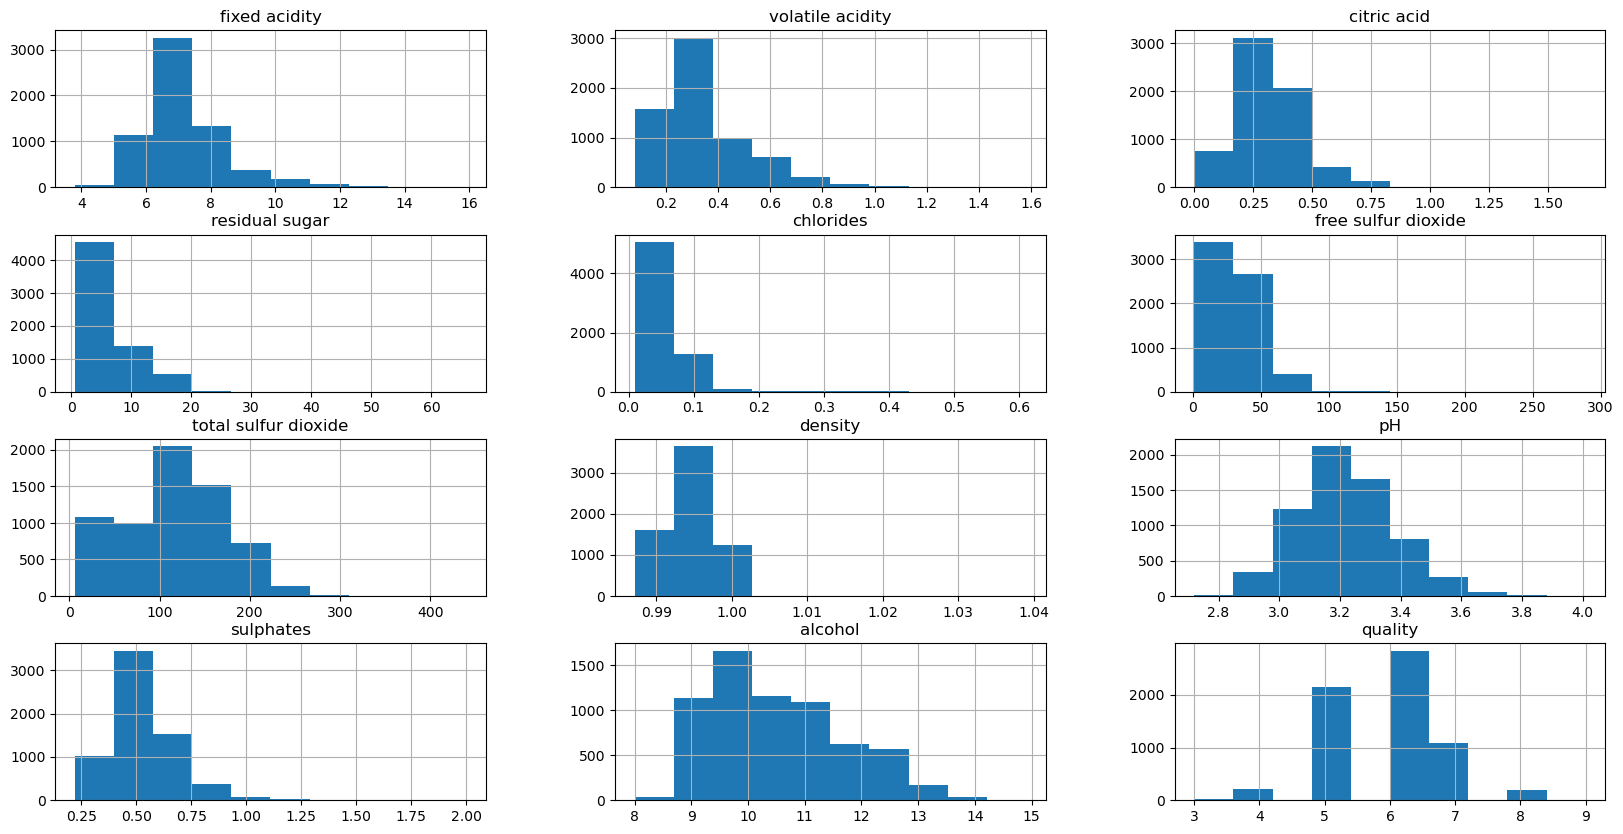

In [4]:
df.hist(figsize=(20,10))

Voir la corrélation entre toutes les colonnes.

<Axes: >

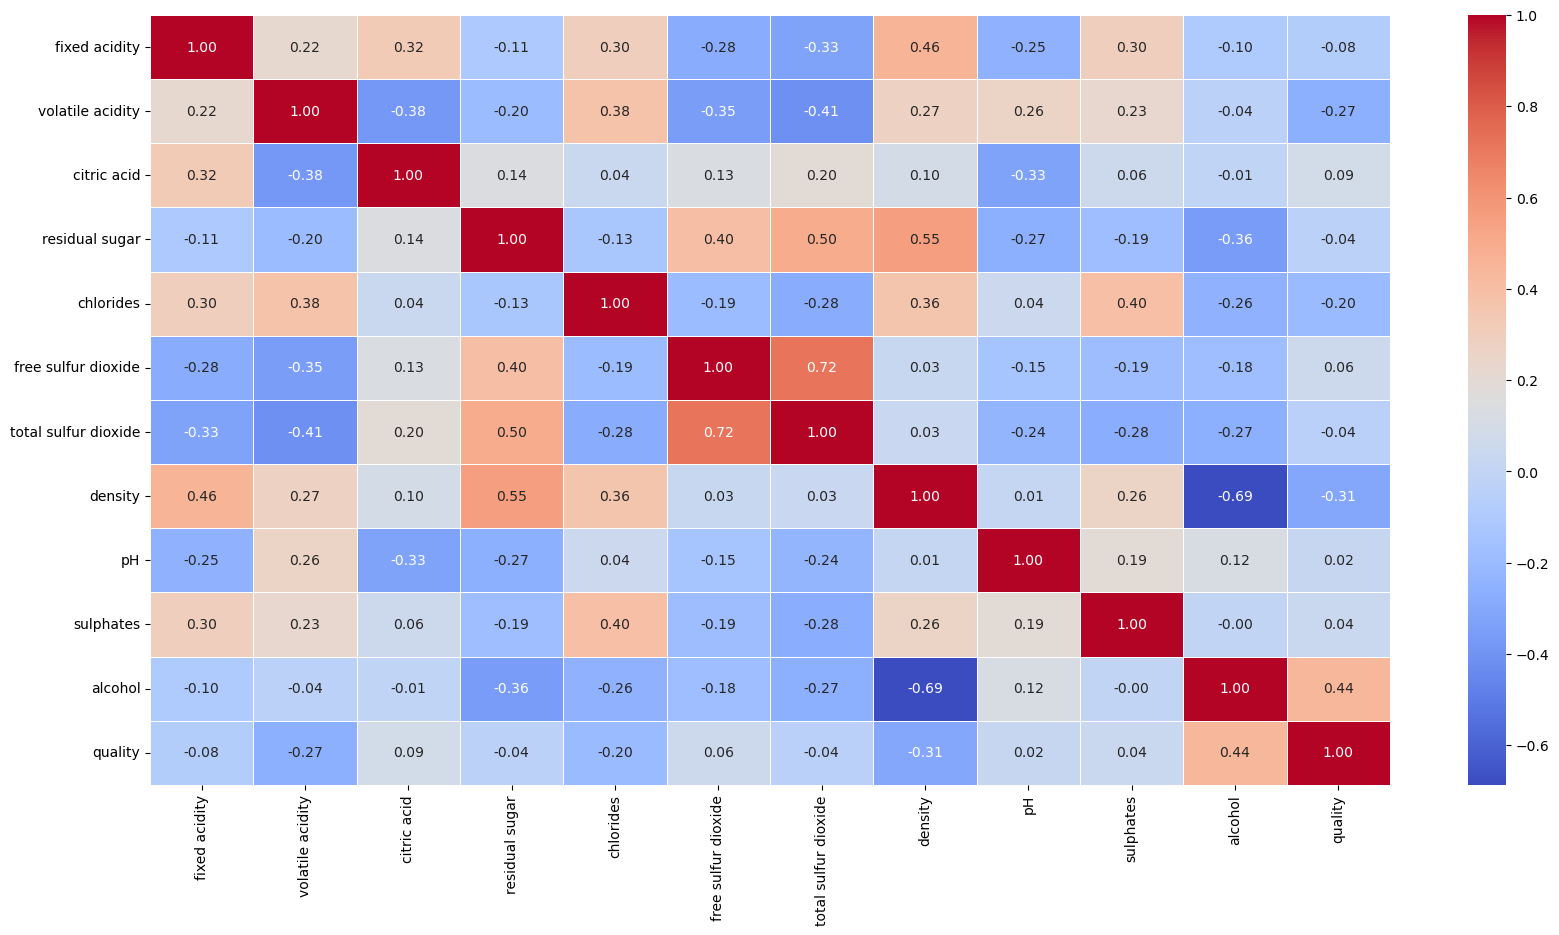

In [5]:
df.corr(numeric_only=True)
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True,  cmap='coolwarm', fmt=".2f", linewidths=0.5)

Seule 'alcohol' a une corrélation avec 'quality'.

In [6]:
df.quality.unique() # array([6 , 5 , 7 , 8 , 4 , 3 , 9])

array([6, 5, 7, 8, 4, 3, 9])

7 valeurs Uniques est mauvais. Considéer 1 si la valeur supérieure à 5 et 0 si elle est inférieure.

In [7]:
df['best quality'] = [1 if x > 5 else 0 for x in df['quality']]

Suppression de la colonnes 'quality'.

In [8]:
df = df.drop(columns='quality')

Traitemnt de la colonnes catégorielle.

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

Fractionneement.

In [10]:
y = df['best quality']
x = df.drop(columns='best quality')


from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=89)

Il faut normaliser la distribution des valeurs dans chaque colonnes pour quelle soit favorable.

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Added MinMaxScaler import

norm = MinMaxScaler()
x_train = norm.fit_transform(x_train)
x_test = norm.transform(x_test)

Création d'un modèle de prédiction.

Le seul modèle régressif pour la classification est la régression logistique.

In [12]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(x_train , y_train)

lr_predication = lr_model.predict(x_test)
lr_predication


from sklearn.metrics import accuracy_score

lr_accuracy = accuracy_score(y_test , lr_predication)
lr_accuracy # 0.7469230769 (74.7%. Bien)

0.76

Test avec le modèle XGBoost.

In [13]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(x_train , y_train)

xgb_predication = xgb_model.predict(x_test)
xgb_predication

xgb_accuracy = accuracy_score(y_test , xgb_predication)
xgb_accuracy # 0.6746153846153846 (67%, c'est moins bien que la régression logistique)

0.8107692307692308

Essai de la classifiction à vecteur de support.

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = np.random.rand(100, 4)
y = np.random.randint(0, 2, 100)

# Diviser les données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et former le modèle SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

# Faire des prédictions et calculer la précision
svc_prediction = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_prediction)
svc_accuracy # 0.740792307692301 (74%, lègèrement moin bien que la régresssioon logistique)

0.55